# Ridge Regression Model
As part of the overall stacking model, I will develop three linear models: Logistic Regression, Ridge Classifier, and Linear SVM. 
  
In this notebook, I set out to optimise the Ridge Regression model. The optimisation sequence was as follows:  
  
1. Alpha (0.1)
2. RFECV (All)
3. Normalize (True)
  
The final CV score was **83.46%**.

In [1]:
# Import modules
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.feature_selection import RFECV, RFE
from sklearn.manifold import Isomap
from sklearn.metrics import accuracy_score, auc, make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RepeatedKFold, KFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
import kaggle_titanic as kt
import warnings

# Settings
%matplotlib inline
matplotlib.style.use('ggplot')
warnings.filterwarnings('ignore')

## Prepare Data

In [2]:
# Import data
df = pd.read_csv('train.csv')

# Clean data
df = kt.clean_all(df)

# Encode data (only for RFECV purposes)
df_encoded, _ = kt.encode_train(df)

## Global Settings

In [3]:
# Create fold indices
folds = kt.get_folds(df=df, random_state=123)

# Get all datasets
all_sets = kt.prep_sets(df, folds)

## Iteration 1: Tune Alpha

Computing test scores for alpha = 0.0001...Done!
Computing test scores for alpha = 0.001...Done!
Computing test scores for alpha = 0.01...Done!
Computing test scores for alpha = 0.05...Done!
Computing test scores for alpha = 0.1...Done!
Computing test scores for alpha = 0.5...Done!
Computing test scores for alpha = 1...Done!
Computing test scores for alpha = 5...Done!
Computing test scores for alpha = 10...Done!
Computing test scores for alpha = 20...Done!
Computing test scores for alpha = 50...Done!


[ RESULTS ]
   Best Score: 0.8345507728065986
Optimal Value: 0.1


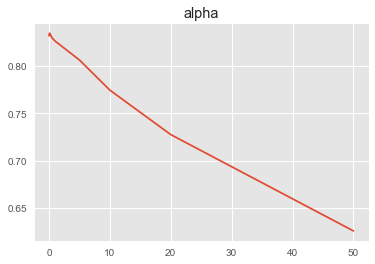

In [8]:
# Define parameters
param_alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50]
params = {
    'alpha': param_alpha
}

# Grid Search with CV
cv_res, best_alpha = kt.score_grid(
    estimator = RidgeClassifier(
        random_state = 123,
        normalize = True
        # alpha = best_alpha,
    ),  
    params = params,
    all_sets = all_sets,
    n_jobs = 3,
    verbose = True
)

## Iteration 2: RFECV for Feature Selection

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    2.8s finished


   Best Score: 0.8345507728065986
Optimal Value: 65


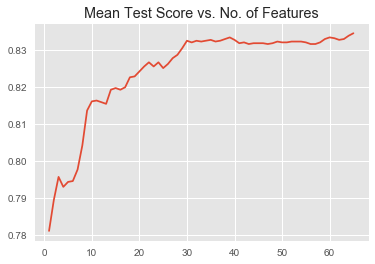

In [10]:
# Run RFECV
cv_res, best_n_features, opt_feats = kt.custom_rfecv(
    estimator = RidgeClassifier(
        random_state = 123,
        normalize = True,
        alpha = best_alpha,
    ),
    sub_sets = all_sets,
    df = df_encoded,
    step = 1,
    n_jobs = 3,
    verbose = True
)

### Subset Features

In [11]:
# Separate features
final_feats = list(opt_feats)
print(final_feats)

['pclass_OC', 'sex_BN', 'age_OC', 'age_NM', 'sibsp_NM', 'sibsp_OC', 'parch_NM', 'parch_OC', 'fare_NM', 'fare_OC', 'pclass_ME', 'title_ME', 'age_ME', 'sibsp_ME', 'parch_ME', 'ticlen_ME', 'fare_ME', 'cabletter_ME', 'cabno_ME', 'embarked_ME', 'pclass_OH_CLASS1', 'pclass_OH_CLASS2', 'pclass_OH_CLASS3', 'title_OH_Master.', 'title_OH_Miss.', 'title_OH_Mr.', 'title_OH_Mrs.', 'title_OH_Other', 'sex_OH_female', 'sex_OH_male', 'age_OH_A0', 'age_OH_A1', 'age_OH_A2', 'age_OH_A3', 'age_OH_A4', 'age_OH_A5', 'age_OH_A6', 'age_OH_A7', 'age_OH_A8', 'age_OH_A9', 'sibsp_OH_None', 'sibsp_OH_One', 'sibsp_OH_Two or More', 'parch_OH_None', 'parch_OH_One', 'parch_OH_Two or More', 'ticlen_OH_L4', 'ticlen_OH_L5', 'ticlen_OH_L6', 'ticlen_OH_LO', 'fare_OH_G0', 'fare_OH_G1', 'fare_OH_G2', 'fare_OH_G3', 'fare_OH_G4', 'fare_OH_G5', 'cabletter_OH_B/D/E', 'cabletter_OH_NIL', 'cabletter_OH_Others', 'cabno_OH_C1', 'cabno_OH_C2', 'cabno_OH_NIL', 'embarked_OH_C', 'embarked_OH_Q', 'embarked_OH_S']


In [12]:
# Re-generate sets
new_sets = kt.prep_sets(df = df, folds = folds, feats = final_feats)

## Iteration 3: Tune Normalisation

Computing test scores for normalize = True...Done!
Computing test scores for normalize = False...Done!


[ RESULTS ]
   Best Score: 0.8345507728065986
Optimal Value: True


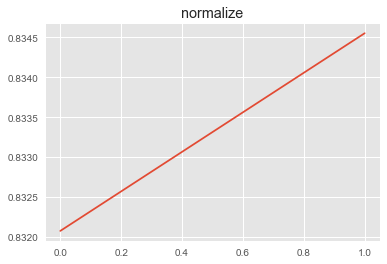

In [14]:
# Define parameters
param_norma = [True, False]
params = {
    'normalize': param_norma
}

# Grid Search with CV
cv_res, best_subsample = kt.score_grid(
    estimator = RidgeClassifier(
        random_state = 123,
        # normalize = True,
        alpha = best_alpha,
    ),
    params = params,
    all_sets = new_sets,
    n_jobs = 3,
    verbose = True
)

## Iteration 4: Re-tune Alpha

Computing test scores for alpha = 0.0...Done!
Computing test scores for alpha = 0.001...Done!
Computing test scores for alpha = 0.002...Done!
Computing test scores for alpha = 0.003...Done!
Computing test scores for alpha = 0.004...Done!
Computing test scores for alpha = 0.005...Done!
Computing test scores for alpha = 0.006...Done!
Computing test scores for alpha = 0.007...Done!
Computing test scores for alpha = 0.008...Done!
Computing test scores for alpha = 0.009000000000000001...Done!
Computing test scores for alpha = 0.01...Done!
Computing test scores for alpha = 0.011...Done!
Computing test scores for alpha = 0.012...Done!
Computing test scores for alpha = 0.013000000000000001...Done!
Computing test scores for alpha = 0.014...Done!
Computing test scores for alpha = 0.015...Done!
Computing test scores for alpha = 0.016...Done!
Computing test scores for alpha = 0.017...Done!
Computing test scores for alpha = 0.018000000000000002...Done!
Computing test scores for alpha = 0.019...Done

Computing test scores for alpha = 0.164...Done!
Computing test scores for alpha = 0.165...Done!
Computing test scores for alpha = 0.166...Done!
Computing test scores for alpha = 0.167...Done!
Computing test scores for alpha = 0.168...Done!
Computing test scores for alpha = 0.169...Done!
Computing test scores for alpha = 0.17...Done!
Computing test scores for alpha = 0.171...Done!
Computing test scores for alpha = 0.17200000000000001...Done!
Computing test scores for alpha = 0.17300000000000001...Done!
Computing test scores for alpha = 0.17400000000000002...Done!
Computing test scores for alpha = 0.17500000000000002...Done!
Computing test scores for alpha = 0.176...Done!
Computing test scores for alpha = 0.177...Done!
Computing test scores for alpha = 0.178...Done!
Computing test scores for alpha = 0.179...Done!
Computing test scores for alpha = 0.18...Done!
Computing test scores for alpha = 0.181...Done!
Computing test scores for alpha = 0.182...Done!
Computing test scores for alpha = 

Computing test scores for alpha = 0.329...Done!
Computing test scores for alpha = 0.33...Done!
Computing test scores for alpha = 0.331...Done!
Computing test scores for alpha = 0.332...Done!
Computing test scores for alpha = 0.333...Done!
Computing test scores for alpha = 0.334...Done!
Computing test scores for alpha = 0.335...Done!
Computing test scores for alpha = 0.336...Done!
Computing test scores for alpha = 0.337...Done!
Computing test scores for alpha = 0.338...Done!
Computing test scores for alpha = 0.339...Done!
Computing test scores for alpha = 0.34...Done!
Computing test scores for alpha = 0.341...Done!
Computing test scores for alpha = 0.342...Done!
Computing test scores for alpha = 0.343...Done!
Computing test scores for alpha = 0.34400000000000003...Done!
Computing test scores for alpha = 0.34500000000000003...Done!
Computing test scores for alpha = 0.34600000000000003...Done!
Computing test scores for alpha = 0.34700000000000003...Done!
Computing test scores for alpha = 

Computing test scores for alpha = 0.491...Done!
Computing test scores for alpha = 0.492...Done!
Computing test scores for alpha = 0.493...Done!
Computing test scores for alpha = 0.494...Done!
Computing test scores for alpha = 0.495...Done!
Computing test scores for alpha = 0.496...Done!
Computing test scores for alpha = 0.497...Done!
Computing test scores for alpha = 0.498...Done!
Computing test scores for alpha = 0.499...Done!


[ RESULTS ]
   Best Score: 0.834998955594873
Optimal Value: 0.092


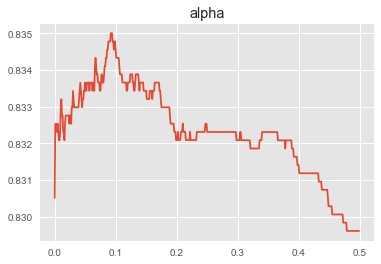

In [17]:
# Define parameters
param_alpha = np.arange(0, 0.5, 0.001)
params = {
    'alpha': param_alpha
}

# Grid Search with CV
cv_res, best_subsample = kt.score_grid(
    estimator = RidgeClassifier(
        random_state = 123,
        normalize = True,
        alpha = best_alpha,
    ),
    params = params,
    all_sets = new_sets,
    n_jobs = 3,
    verbose = True
)